# Welcome to the wonderful (_and sometimes confusing_) world of Rotations!
                                                                     

## Table of contents 

### [0. Preface](#0)
### [1. A rotation matrix and the importance of perspective](#1)
### [2. The elementarty rotation matrices](#2)
### [3. Introducing rotation_tools.py](#3)
### [4. Euler (and Tait-Brian) angles ](#4)
### [5. Applying sequences of rotations](#5)

In [15]:
# Common imports 
import numpy as np 
import matplotlib.pyplot as plt

# This aids development by ensuring all modified libraries are reloaded before dependent execution 
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preface <a name="0"></a>

Over the last 100 years or so, mathematicians have devised a plethora of methods for describing rotations in three-dimensional space. With each method comes a unique set of pros and cons ranging from interpretability to computational efficiency. Of these methods, we will be focusing on: 

1. Euler (and Tait-Brian) angles

2. Rotation matrices

3. Quaternions

### Where does the confusion come from?  (You must read this) 
If you are aware of some of the sources of confusion you will know what to look out for and when to pay special attention - don't get caught out! 

1. In my opinion - a huge amount of the confusion is caused by the typical way in which the fundamental concepts and ideas about rotations are taught - namely, from a single perspective. For example, the result of a pre-multiplying a rotation matrix with a column vector can be interpreted as two (and probably more) completely different things depending on your perspective. And so, if you have been taught that a rotation matrix does X and then you see someone using the same matrix to do Y you will find yourself scratching your chin.. **Perspective is the first issue we will deal with.** 


2. Another source of confusion, is how different conventions can be used to represent the same thing. If you are not consistent, or aware of the conventions used you will get caught out. For example:

    - There are **different types of Euler angles**
        1. Proper Euler Angles
        2. Tait-Brian
    
    - The rotation achieved by set of Euler angles **depends on the order in which the rotations are applied**
        1. XYZ, ZYX, YZX
    
    - The result of using Euler angles to achieve rotations **depends on how the rotations are applied**
        1. Intrinsic rotations
        2. Extrinsic rotations
    
    - There are two **different ways to order the components of a quaternion**
        1. Hamiltonian convention: [w, i, j, k]
        2. JPL conventions: [i, j, k, w]


3. Finally - this is a product of point 2 - confusion is caused by the many-to-one mapping between Euler angles and rotation matrices. It's very tempting to try and compute a set of Euler angles given a rotation matrix. However, if you do not know the sequence in which they were applied and whether they were applied intrinsically
or extrinsically it is very likely that you will compute the incorrect result.      

As we work through this tutorial I will do my best to highlight and clarify 

### Right-hand rule

Throughout the tutorial, I will use the same right-hand rule to define the orientation of the **X, Y & Z** axis. Scribbling x,y,z on your fingers is a surprisingly helpful technique. 

![right-hand-rule](images/right-hand-rule.png)

## 1. A rotation matrix and the importance of perspective <a name="1"></a>

In this section we will ultimately explore how the same rotation matrix can represent a number of different opertaions and play a number of different roles, depending on ones perspective and the problem at hand. 

We will do so by deriving the same rotation from three different perspectives and exploring the various roles that it may play.   

### 1.1 Perspective 1 - Rotating a vector in a fixed reference frame (active transform) 

Let's jump right in and derive the rotation matrix used to rotate some vector **$\Large v$** about the z-axis of a **fixed coordinate frame**.

This is known as an active transform. 

Lets assume **$\Large v$** is of length **$\Large r$** and is initially oriented at **$\large \theta$** degrees relative to the X-axis (left image). Rotating **$\Large v$** by **$\large \phi$** degrees counter-clockwise gives us **$\Large \bar v$** (right image).      

![2d-rotation](images/2d-rotation.png)

Starting with the figure on the left, we can represent **$\Large v$** using polar coordinates
## \begin{aligned}
 v_{x} &=  rcos(\theta) \\
 v_{y} &=  rsin(\theta) \\
\end{aligned}
We can do the same with **$\Large \bar v$** , and if we expand we get 
## \begin{aligned}
 \bar v_{x} &=  rcos(\theta + \phi) = rcos(\theta)cos(\phi) - rsin(\theta)sin(\phi) \\
 \bar v_{y} &=  rsin(\theta + \phi) = rcos(\theta)sin(\phi) + rsin(\theta)cos(\phi)\\
\end{aligned}
By substituting the polar coordinates of **$\Large v$** we get 
## \begin{aligned}
\bar v_{x} &= v_{x}cos(\phi) - v_{y}sin(\phi) \\
\bar v_{y} &=  v_{x}sin(\phi) + v_{y}cos(\phi)\\
\end{aligned}
We can express it as (when considered in three-dimensional space) 
## \begin{aligned}
\begin{bmatrix} \bar v_{x} \\  \bar v_{y} \\  \bar v_{z} \end{bmatrix} &= \begin{bmatrix} cos(\phi) & -sin(\phi) & 0 \\ sin(\phi) & cos(\phi) & 0 \\ 0 & 0 & 1  \end{bmatrix}
\begin{bmatrix}v_{x} \\ v_{y} \\ v_{z}\end{bmatrix} = Rz(\phi) \mathbf{v}
\end{aligned}

**$ \Large R(\phi)$** is defined as the elementary rotation matrix that is to rotate any vector in the **fixed frame** by some angle **$ \Large \phi$** about the z-axis

### 1.2 Perspective 2 - Rotated reference frames (passive transform) 

In this exercise, we are going to derive a rotation matrix that can be used to describe the **relative orientation** of some frame *$\Large b$* - that has been rotated by *$  \Large \phi $* degrees counter-clockwise along the z-axis - relative to frame *$\Large a$*.   

This is know as a passive transform. 

We will the notation $ \Large {^a}{x}_{b} $ to represent $ \Large {x}_{b} $ relative to frame *$\Large a$*

![2d-rotation](images/2d-frame-rotation.png)

Starting with the left image, we define *$ \Large X_{b}$* and *$ \Large Y_{b}$* as the unit vectors along the primary axis of frame *$\Large b$*,  $ \large \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $ \large \begin{bmatrix} 0 \\ 1 \end{bmatrix}$  relative to frame *$\Large b$*. If we can represent these unit vectors relative to frame *$\Large a$* we have managed to represent the orientation frame *$\Large b$* relative to frame *$\Large b$*.

We can do this very easily by projecting these vectors onto the x and y axes of *$\Large a$*. 

## \begin{aligned}
\mathbf{{^a}{x}_{b}} &=  \begin{bmatrix} \lVert {^b}{x}_{b} \rVert cos(\phi)  \\ \lVert {^b}{x}_{b} \rVert sin(\phi) \end{bmatrix}  \\
\mathbf{{^a}{y}_{b}} &=  \begin{bmatrix} -\lVert {^b}{y}_{b} \rVert sin(\phi)  \\ \lVert {^b}{y}_{b} \rVert cos(\phi) \end{bmatrix}  \\
\end{aligned}

We can simplify ($ \large \lVert {^b}{x}_{b} \rVert, \large \lVert {^b}{y}_{b} \rVert = 1 $) and group these to represent both axes of frame *$\Large b$* with respect to frame *$\Large b$* in a single matrix 

## \begin{aligned}
(\mathbf{{^a}{x}_{b}}, \mathbf{{^a}{y}_{b}}) = \begin{bmatrix} cos(\phi) & -sin(\phi) \\ sin(\phi) & cos(\phi) \\  \end{bmatrix}
\end{aligned}

Which extends naturally to the three-dimensional case 

## \begin{aligned}
(\mathbf{{^a}{x}_{b}}, \mathbf{{^a}{y}_{b}}, \mathbf{{^a}{z}_{b}}) = \begin{bmatrix} cos(\phi) & -sin(\phi) & 0 \\ sin(\phi) & cos(\phi) & 0 \\0 & 0 & 1 \\  \end{bmatrix} = Rz(\phi)
\end{aligned}

We have now shown how - depending on ones perspective - the columns of the rotation matrix can be interpreted as the unit vectors of some frame *$\Large b$* with respect to frame *$\Large a$*.

### 1.3 Perspective 3 -  Vectors in rotated reference frames (passive transform) 

Perspective 3 leads on very naturally from perspective 2 - and is very similar in nature. In this case, we have some vector *$\Large p $* represented in frame *$\Large b$* which we would like to represent in frame *$\Large a$*. 


![2d-rotation](images/2d-vector-in-rotated-frame.png)

Since the maths is amost identical to the previous example, I will jump directly to the result (deriving it can be considered an exercise for the reader). 

## \begin{aligned}
\mathbf{{^a}{p}} = \begin{bmatrix} cos(\phi) & -sin(\phi) & 0 \\ sin(\phi) & cos(\phi) & 0 \\0 & 0 & 1 \\  \end{bmatrix} \mathbf{{^b}{p}} = Rz(\phi) \mathbf{{^b}{p}}
\end{aligned}

We can write *$ \Large Rz(\phi)$* as *$ \Large {^a}R_{b} $*, indicating that it is a rotation matrix that maps from frame *$\Large b$* to frame *$\Large a$*

## \begin{aligned}
\mathbf{{^a}{p}} = {^a}R_{b} \mathbf{{^b}{p}}
\end{aligned}


Since *$ \Large {^a}R_{b} $*, is an orthonormal matrix (columns and rows make up orthonormal vectors) the following holds

## \begin{aligned}
\mathbf{{^b}{p}} = ({^a}R_{b})^{T} \mathbf{{^a}{p}} = ({^a}R_{b})^{-1} \mathbf{{^a}{p}}
\end{aligned}

### 1.4 Conclusion 

In conclusion, we have shown how the same rotation matrix can play very different roles, depending on the problem and ones perspective. 

The most important take-away is to stop, and take a moment to think about the problem and what exactly the rotation matrix will be used to do. It sounds incredibly simple, and obvious, but sticking to this rule will eliminate a huge amount of confusion.  


## 2. The elementarty rotation matrices <a name="2"></a>

In the previous section we derived - in a few different ways - the elementary rotation matrix for a rotation about the z-axis. The same math can be used to derive the elementary rotation matrices for the x and y axes. All three elementary matrices are shown below. When reading these matrices - based on what we learnt in the previous section - appreciate the different ways in which they can be interpreted.


## \begin{aligned}
Rz(\phi) = \begin{bmatrix} cos(\phi) & -sin(\phi) & 0 \\ sin(\phi) & cos(\phi) & 0 \\0 & 0 & 1 \\  \end{bmatrix} 
\end{aligned}

## \begin{aligned}
Rx(\theta) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\theta) & -sin(\theta) \\0 & sin(\theta) & cos(\theta) \\  \end{bmatrix} 
\end{aligned}

## \begin{aligned}
Ry(\alpha) = \begin{bmatrix} cos(\alpha) & 0 & sin(\alpha)  \\ 0 & 1 & 0 \\ -sin(\alpha) & 0 & cos(\alpha) \\  \end{bmatrix} 
\end{aligned}

## 3. Introducing rotation_tools.py <a name="3"></a>

rotation_tools.py includes implementations of the three elementary rotation matrices as well as a RotationPlotter class for plotting rotation matrices and vectors in three-dimensional space. 

We will use it in the following sections. 

An few examples can be seen below 

### 3.1 Plotting rotation matrices 

<IPython.core.display.Javascript object>


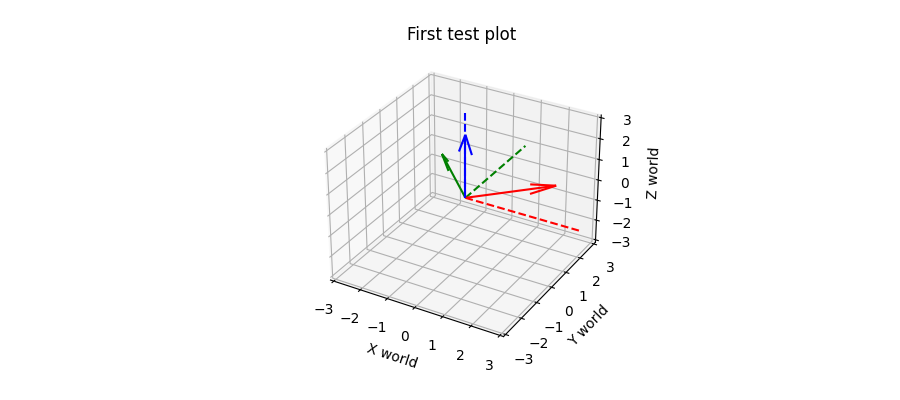

In [16]:
from rotation_tools import Rx, Ry, Rz, CommonPlottingParams, RotationPlotter 

plotting_params = CommonPlottingParams(title="First test plot")
plotter = RotationPlotter(plotting_params)

R1 = Rz(45, degrees=True)
plotter.plot_rotation_matrix_in_world_frame(R1)

<IPython.core.display.Javascript object>


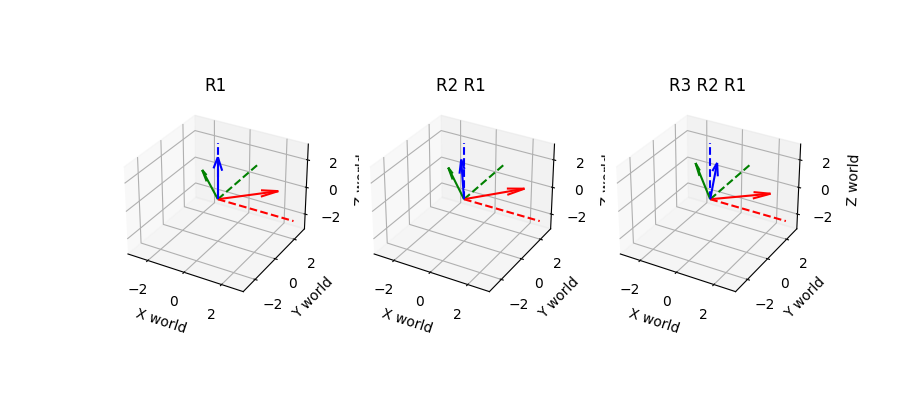

In [17]:
R1 = Rz(45, degrees=True)
R2 = Rx(5, degrees=True)
R3 = Ry(10, degrees=True)

rotations = {"R1": R1,
             "R2 R1": R2 @ R1,
             "R3 R2 R1": R3 @ R2 @ R1}

plotting_params = CommonPlottingParams(title="First test plot")
plotter = RotationPlotter(plotting_params)

plotting_params.size_in_inches = (10, 4)
plotter.plot_multiple_rotation_matrices(rotations)

### 3.2 Plotting rotation matrices and vectors 

Let's take the vector  $ \large \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$, and rotate it 90 degrees about the z axis.  

<IPython.core.display.Javascript object>


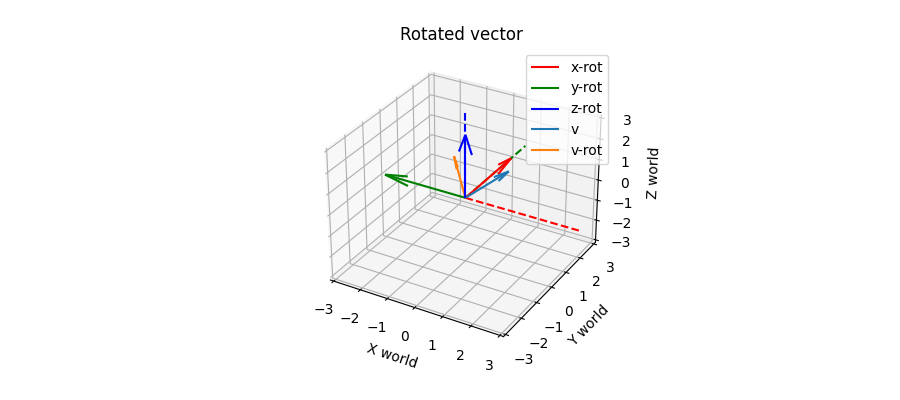

In [18]:
from rotation_tools import Rz, RotationPlotter, CommonPlottingParams

v = np.array([1, 1, 1]).reshape(3,1)
RZ = Rz(90, degrees=True)
v_rotated = RZ @ v

vectors = {"v": v, "v-rot": v_rotated}

plotting_params = CommonPlottingParams(title="Rotated vector", show_labels=True)

plotter = RotationPlotter(plotting_params)
plotter.plot_rotation_matrix_and_vectors_in_world_frame(RZ, vectors)

## 4. Euler (and Tait-Brian) angles <a name="4"></a>

So far, we have explored applying and defining rotations using 3x3 rotation matrices. We also recognised that to calculate these rotation matrices we need some angle defined relative to some axis - it's time to explore these angles in more detail, and learn about all their variations. 

A couple of hundred years ago, Leonhard Euler said something along the lines of: "Any three-dimensional rotation can be described by three successive rotations about linearly independent axes". 

True to form, that's been quite an impactful statement, however, practically speaking, there is quite a lot of *wiggle room* - which, naturally, is the of confusion. 

The *wiggle room*: 
1. Linearly independent axes. How are these axes defined, are they fixed (extrinsic) or do they rotate with the rotating body/frame (intrinsic)?  
2. Three successive rotations. Rotations in what order? Is the order important? The answer is yes! 

The next two sections will address this *wiggle room*. 

At this stage, I recommend picking up some rigid object - a mobile phone will do. Visualise an xyz axis attached to the centroid of the object (using the previously described right-hand rule). As we move through the following sections, rotate this object and use it as a tool to **sanity-check** your intuition.

I would also recommend using the various tools in **rotation_tools.py**. If something doesn't make sense or you don't agree pop a few lines of code in and visualise what you are thinking. 

Finally, the [wikipedia page](https://en.wikipedia.org/wiki/Euler_angles#:~:text=The%20Euler%20or%20Tait%E2%80%93Bryan,respect%20to%20the%20x%20axis.) on Euler angles is very good - so be sure to take a look. This sections is largely based on it. 

### 4.1 Intrinsic vs. extrinsic rotations 

Rotations, regardless of order, may be extrinsic or intrinsic. 

- **Extrinsic rotations** are rotations about a motionless coordinate system. The base coordinate system remains fixed regardless of how the body or system or interest is rotated.   

- **Intrinsic rotations** are rotations about coordinate system that is fixed to the body or system of interest.


To think about this, hold out your mobile phone, assign virtual axes and test your intuition. 

[This is best described visually (source of image)](https://dreamanddead.github.io/post/understanding-euler-angles/#:~:text=The%20three%20elemental%20rotations%20may,solidary%20with%20the%20moving%20object) 

![extrinsic-intrinstic](images/extrinsic-intrinsic.png)






### 4.2 Order of rotations 

As a reminder, the [wikipedia page](https://en.wikipedia.org/wiki/Euler_angles) is fantastic - and I do not intend to repeat it here. I will provide the following summary, but strongly recommend taking a look.  

With our elementary rotations in mind, there are twelve possible sequences of rotations: 

- Proper Euler angles:  **(z-x-z, x-y-z, y-z-y, z-y-z, x-z-x, y-z-y)** 
- Tait-Bryan angles:  **(x-y-z, y-z-x, z-x-y, x-z-y, z-y-x, y-x-z)**

Note - Tait-Bryan angle are commonly used in aerodynamics, navigation, mobile robotics and more. 

The typical definition of **roll, pitch, yaw** (X-Y-Z) is therefore an sequence of **intrinsic Tait-Brian angles.** 

### 4.3 Conclusion 

The most important take-away from this section is that you stop and think about the following, before attempting to use Euler/Tait-Brian angles in an application: 

1. Are they intrinsically or extrinsically defined  
2. In what sequence/order are the rotations applied   

In the next section, we will explore applying sequences of intrinsic/extrinsic Euler/Tait-Brian rotations.

## 5. Applying sequences of rotations <a name="5"></a>

We can apply sequences of rotations simply by multiplying the elementary rotation matrices that correspond to the individual rotations. 

**However, the order that we multiply these rotation matrices depends on whether the rotations are extrinsically or intrinsically defined**.

Inversely, any rotation matrix may be decomposed into a product of three elementary rotation matrices.  Again,  the order depends on whether the rotations were are extrinsically or intrinsically.   

### 5.1 Extrinsic X-Y-Z (Tait-Bryan) rotations 

Consider the common scenario whereby the orientation of an object is defined by XYZ angles. Explicitly, we will applying a rotation about the X axis, followed by the Y axis, followed by the Z axis.   

If these angles are **extrinsically defined**, we can compute the rotation matrix as follows: 

## \begin{aligned}
R(\phi, \alpha, \theta) = Rz(\phi)Ry(\alpha)Rx(\theta) 
\end{aligned}

Let's consider the following example:  $\Large \theta$= 20,  $\Large \alpha$= 45, $\Large \phi$ = 90.   

Hold out your mobile phone (or just use your right hand) and visualise an xyz frame attached to the centroid -  using the right-hand rule - perform the three **extrinsic rotations**. 

Remember - this is considered an **active transform**. 

Take a mental note of where the three axes of your body fixed frame ended up after the rotation. 

Let's now compare that to what rotation_tools thinks (the dashed lines represent the fixed world frame)...

<IPython.core.display.Javascript object>


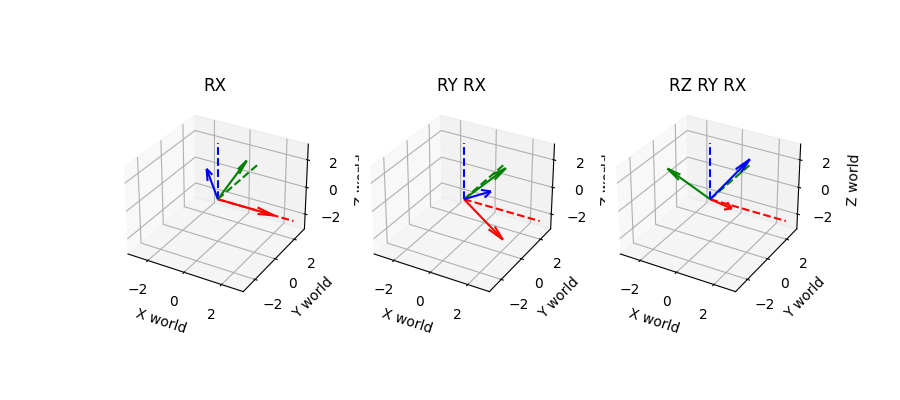

In [19]:
from rotation_tools import Rx, Ry, Rz, CommonPlottingParams, RotationPlotter 

RX = Rx(20, degrees=True)
RY = Ry(45, degrees=True)
RZ = Rz(90, degrees=True)

rotations = {"RX": RX,
             "RY RX": RY @ RX,
             "RZ RY RX": RZ @ RY @ RX}

plotting_params = CommonPlottingParams()
plotter = RotationPlotter(plotting_params)
plotter.plot_multiple_rotation_matrices(rotations)

Let's **change the order of rotations** and compare the result with the previous example. Let's try the following order Z-Y-X which would be defined as: 

## \begin{aligned}
R(\phi, \alpha, \theta) = Rx(\theta)Ry(\alpha)Rz(\phi) 
\end{aligned}

Before we use rotation tools, test your intuiting by extrinsically rotating your mobile phone (or hand) in the new order. Take a mental note of your final orientation.  

Let's see what rotation tools gives us - does it match the orientation of your mobile phone? 

<IPython.core.display.Javascript object>


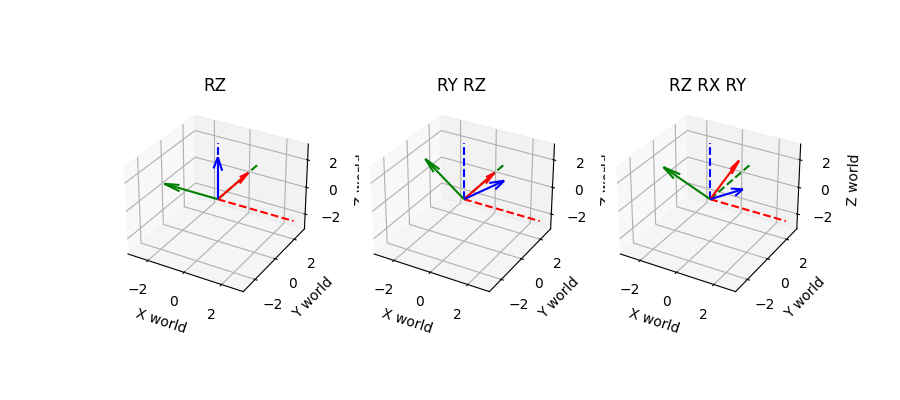

In [20]:
rotations = {"RZ": RZ,
             "RY RZ": RY @ RZ,
             "RZ RX RY": RX @ RY @ RZ}


plotting_params = CommonPlottingParams()
plotter = RotationPlotter(plotting_params)
plotter.plot_multiple_rotation_matrices(rotations)

We can also test our intuition while considering the **passive transform case**. 

Let's imagine we want to represent some vector $ \large v =  \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$  defined in the final rotated frame, in the world frame. Do do this, we can use the same rotation matrix. 


## \begin{aligned}
{^{world}}v = Rz(\phi)Ry(\alpha)Rx(\theta)  \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
\end{aligned}

V_body: [1 1 1]
V_world: [-0.59767248  1.61341457  0.19920101]


<IPython.core.display.Javascript object>


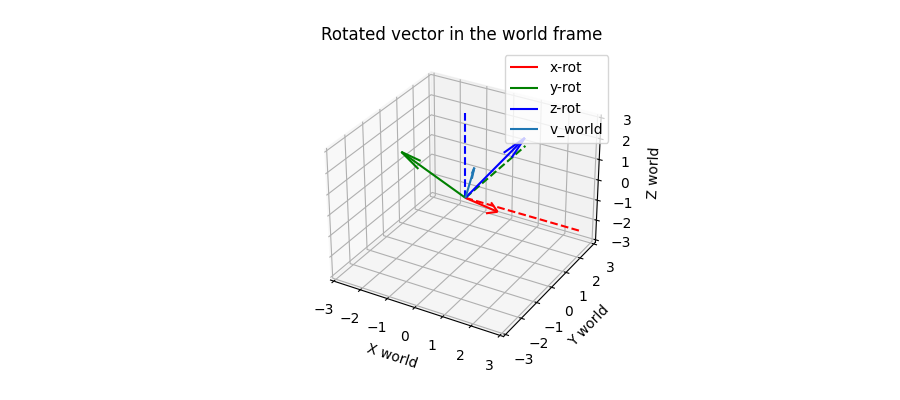

In [21]:
R = RZ @ RY @ RX
v_body = np.array([1, 1, 1]).reshape(3,1)
v_world = R @ v_body

vectors = {"v_world": v_world}

print(f"V_body: {v_body.flatten()}")
print(f"V_world: {v_world.flatten()}")

plotting_params = CommonPlottingParams(title="Rotated vector in the world frame", show_labels=True)

plotter = RotationPlotter(plotting_params)
plotter.plot_rotation_matrix_and_vectors_in_world_frame(R, vectors)

### 5.1.1 Interactive X-Y-Z extrinsic rotations 

We can use widgets to create an interactive extrinsic rotation. 


Change the angles of rotation and observe the rotated axes and the corresponding rotation matrix



In [32]:
import ipywidgets as widgets
from IPython.display import display
from rotation_tools import Rx, Ry, Rz, CommonPlottingParams, RotationPlotter 

plotting_params = CommonPlottingParams(title="Interactive rotation matrix -> play with widgets")
plotter = RotationPlotter(plotting_params)

def update_plot(theta, alpha, phi):
    RX = Rx(theta, degrees=True) 
    RY = Ry(alpha, degrees=True) 
    RZ = Rz(phi, degrees=True)
    R = RZ @ RY @ RX
    
    print("Rotation Matrix: ")
    print(np.round(R, 2))
    
    plotter.plotting_params.plotting_axes.clear()
    plotter.plot_rotation_matrix_in_world_frame(R)
    plt.show()


print("----------------------------- Extrinsic X-Y-Z ---------------------------")
widgets.interactive(update_plot,
                    theta=widgets.FloatSlider(min=-360, max=360, value=1, description="Theta (x): "),
                    alpha=widgets.FloatSlider(min=-360, max=360, value=1, description="Alpha (y): "),
                    phi=widgets.FloatSlider(min=-360, max=360, value=1, description="Phi (z): "))

Rotation Matrix: 
[[ 1.   -0.02  0.02]
 [ 0.02  1.   -0.02]
 [-0.02  0.02  1.  ]]



### 5.2 Intrinsic X-Y-Z (Tait-Bryan) rotations (TODO)

- When these angles are intrinsically defined, they are reffered to as roll (X), then pitch (Y), then yaw (Z).
- The order of multiplication of the rotation matrix is swapped. 

### 6. Calculating Euler angles from rotation matrices (TODO) <a name="6"></a>

- Just show rotation matrix for 2 cases and show how calculating the angles depends on the symbolic representation of the rotation matrix
- The mapping is not 1-1. It is one to many. One rotation matrix to many euler angles... 

- atan2 removes the ambiguity of the inverse tan function by using the two equations we have for determining the result.   

### Current Uncertainty (Personal work): 

0. In the intrinsic case, does applying the opposite order actually pull from one frame to another or do we just do that because it's the opposite to the extrinsic case? 

1. Why do intrinsic and extrinsic of opposite orders end up in the same place? 
    1. Why does an intrinsic rotation in order XYZ R = RxRyRz result in the same orientation of an extrinsic rotation of R = RzRyRx? 
    2. Do we use this principal to calculate the extrinsic rotation matrix? 